# Pandas Test - Real life Exercise

In [1]:
import pandas as pd

For visualizations:

In [38]:
%pip install cufflinks

     -------------------------------------- 81.7/81.7 kB 916.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=8eb041565d67ea087fd620a97cd67233a05d31dc8e0ecce90f2e4fe1b0ed3c0c
  Stored in directory: c:\users\mor\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [88]:
%pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [89]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [44]:
#ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated = pd.read_csv('C:/Users/mor/PythonDataScienceHandbook/Exercises/data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
138720,2021-week_42,AD078FKPSF,MoJoe Brewing Company,JP,yes,NaN,Yield,UserPopY
279883,2022-week_01,AD08R777GL,RelayFoods,IN,yes,NaN,Qality,UserPopQ
282514,2022-week_01,AD00U9WK87,Extreme DA,US,yes,NaN,Yield,XGBY
101986,2021-week_40,AD09GTYXVR,Search Million Culture,DE,yes,NaN,Qality,DNNQ
124991,2021-week_41,AD07876VTK,RelayFoods,JP,yes,NaN,Qality,DNNQ


In [46]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()

In [45]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [47]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [48]:
## Q1
ad_recs_annotated['year_id'] = ad_recs_annotated['week_id'].str.split(pat = "-").str.get(0)

ad_recs_annotated.year_id


0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
373783    2022
373784    2022
373785    2022
373786    2022
373787    2022
Name: year_id, Length: 373788, dtype: object

In [55]:
## Q2
df = pd.DataFrame()
df['year'] = ad_recs_annotated.year_id
df['week'] = ad_recs_annotated.week_id.str.split(pat = "-week_").str.get(1)
df['day'] = 4
df['date'] = pd.to_datetime(df.year.astype(str) + df.week.astype(str) + df.day.astype(str), format='%Y%W%w')

ad_recs_annotated['quarter_id'] = df['date'].dt.quarter

ad_recs_annotated.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year_id,quarter_id
178482,2021-week_45,AD008JVPAD,RelayFoods,IN,yes,NaN,Qality,UserPopQ,2021,4
328918,2022-week_04,AD00NLR8PX,Fancy,US,yes,NaN,Qality,ManualQ,2022,1
70616,2021-week_37,AD07RXVDMT,Extreme DA,US,yes,NaN,Yield,DNNY,2021,3
210783,2021-week_47,AD07MS8CCV,RelayFoods,JP,yes,NaN,Qality,UserPopQ,2021,4
148713,2021-week_43,AD0789Q7SD,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,4
354016,2022-week_06,AD00AVUQPT,Extreme DA,US,yes,NaN,Yield,RNNY,2022,1
330574,2022-week_05,AD0086998X,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2022,1
5421,2021-week_33,AD08RNNLSS,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,3
316151,2022-week_04,AD08N0Y7E8,RelayFoods,DE,yes,NaN,Qality,UserPopQ,2022,1
217897,2021-week_48,AD008SEKF8,MoJoe Brewing Company,DE,yes,NaN,Yield,UserPopY,2021,4


In [11]:
## Q3
ad_recs_annotated['success'] = ad_recs_annotated.is_success.replace({'yes': 1}).replace({'no': 0})
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year_id,success
195831,2021-week_46,AD0000DJLN,RelayFoods,JP,yes,NaN,Qality,DNNQ,2021,1
303835,2022-week_03,AD07VMHML8,RelayFoods,GB,yes,NaN,Qality,DNNQ,2022,1
367934,2022-week_52,AD07WH968X,RelayFoods,JP,yes,NaN,Qality,UserPopQ,2022,1
168882,2021-week_44,AD088888T6,Extreme DA,US,yes,NaN,Qality,RNNQ,2021,1
331346,2022-week_05,AD088QGQH,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2022,1


In [12]:
## Q4
ad_recs_annotated.is_sever.isnull().sum()
ad_recs_annotated['is_sever_new'] = ad_recs_annotated.is_sever.replace({None: False})
ad_recs_annotated.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year_id,success,is_sever_new
157301,2021-week_43,AD09889W7Z,"Doctorfun Entertainment, Ltd",US,yes,NaN,Qality,RuleBased,2021,1,False
369453,2022-week_52,AD088R8NC8,RelayFoods,JP,yes,NaN,Qality,DNNQ,2022,1,False
134274,2021-week_42,AD07QCN6QC,RelayFoods,GB,no,False,Qality,UserPopQ,2021,0,False
287092,2022-week_02,AD078N7ZM8,RelayFoods,DE,yes,NaN,Qality,UserPopQ,2022,1,False
326202,2022-week_04,AD00DKFDDE,Fancy,US,yes,NaN,Qality,DNNQ,2022,1,False
34352,2021-week_35,AD088S8WL6,Search Million Culture,IN,yes,NaN,Yield,RuleBasedY,2021,1,False
200822,2021-week_46,AD088G6J88,Extreme DA,US,yes,NaN,Yield,DNNY,2021,1,False
256010,2021-week_50,AD0088YGNC,Extreme DA,US,yes,NaN,Yield,DNNY,2021,1,False
353248,2022-week_06,AD07S69YHK,Search Million Culture,JP,yes,NaN,Qality,DNNQ,2022,1,False
261678,2021-week_51,AD08888SP8,Fry Multimedia,GB,no,True,Qality,XGBQ,2021,0,True


In [109]:
## Q5
ad_recs_annotated.is_success = ad_recs_annotated.is_success.str.capitalize()
ad_recs_annotated.is_success.sample(5)

299028    Yes
335773     No
203574    Yes
134731    Yes
189893    Yes
Name: is_success, dtype: object

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [116]:
## Q1 How many requests are there in US region?
ad_recs_annotated[ad_recs_annotated.region == 'US'].region.count()

103846

In [120]:
## Q2 How many successful requests are there in US region?
ad_recs_annotated.query("region == 'US' and is_success == 'Yes'").region.count()

88918

In [137]:
## Q3 How many successful requests are there in US region, on week 52?
ad_recs_annotated['week'] = ad_recs_annotated.week_id.str.split(pat = "-week_").str.get(1)

ad_recs_annotated.query("region == 'US' and is_success == 'Yes' and week == '52' ").week_id.count()

3342

In [140]:
## Q5 How many requests where delivered by rule based providers?

ad_recs_annotated.rec_provider.str.startswith("RuleBased").sum()


28336

In [143]:
## Q6 Select only the requests from 2021 - How many are there?
ad_recs_annotated[ad_recs_annotated.year_id == '2021'].year_id.count()

271615

In [149]:
## Q7 Select the reqeusts from week 30 to week 40 - How many are there
#ad_recs_annotated.sample(3)
pd.to_numeric(ad_recs_annotated.week)
ad_recs_annotated.query("week >= '30'  and week <= '40' ").week_id.count()

115051

In [154]:
## Q8 Select all the data that comes from the most popular Ad
#ad_recs_annotated.sample(3)
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year_id,quarter_id,success,is_sever_new,week
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False,52
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False,52
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False,52
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False,52


In [42]:
## Q9 Select all the data that comes from the least popular provider
least_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmin()
ad_recs_annotated.query('ad_id == @least_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year_id,success,is_sever_new
251351,2021-week_50,AD08ZLWHHR,RelayFoods,IN,yes,NaN,Qality,UserPopQ,2021,1,False


In [165]:
## Q10 Select the data in which is_sever is None. How big is it?

ad_recs_annotated.query('is_sever.isnull()').shape[0]

304195

In [195]:
## Q11 Select the data in which the requester is a 3 word company

ad_recs_annotated.query('requester.str.split().str.len() == 3')


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year_id,quarter_id,success,is_sever_new,week
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False,52
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False,52
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False,52
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,4,1,False,52


In [14]:
## Q12 Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it


ad_recs_annotated.query('requester.str.split().str.len() == 3 and ad_id.str.contains("6") == True')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year_id,success,is_sever_new
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,1,False
11,2021-week_33,AD88967068,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,1,False
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,1,False
...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,yes,NaN,Yield,RuleBasedY,2022,1,False
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,yes,NaN,Yield,DNNY,2022,1,False
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,yes,NaN,Yield,DNNY,2022,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,yes,NaN,Yield,DNNY,2022,1,False


In [36]:
## Q13 Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
def is_prod_bigger_than_30(ad_id):
    digits = [int(c) for c in ad_id if c.isdigit()]
    prod = 1
    for d in digits:
        prod *= d
    return prod > 30

m1 = ad_recs_annotated.ad_id.apply(is_prod_bigger_than_30)
m2 = ad_recs_annotated.requester.apply( lambda s: len(s.split()) == 3)

mask = m1 & m2

mask.value_counts()


False    372805
True        983
dtype: int64

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

In [86]:
## Q1 How many weeks available in the data? Are there any missing weeks?
df.week.unique()

array(['33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '01', '02', '03',
       '04', '05', '06', '52'], dtype=object)

In [ ]:
## Q2 How many regions available in the data? Are there any missing weeks per region?


### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

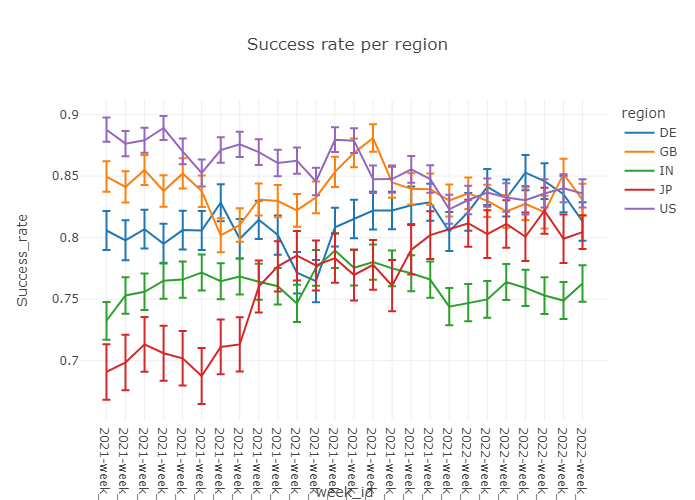

Produce the following requestser proportion graph:

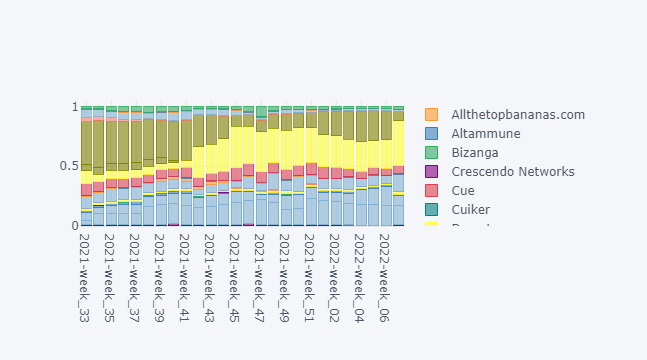

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)